In [14]:
pip install --upgrade tensorflow tensorflow_datasets

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import cifar10


/Users/kevinmathew/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
shuffle_files=True,
as_supervised=True,
with_info=True

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

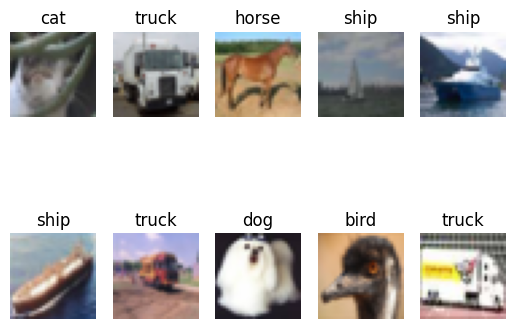

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Class names
classNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting images
def plotImages(images, labels, classNames, nCols=5):
    nRows = 2
    fig, axes = plt.subplots(nRows, nCols)

    for i, ax in enumerate(axes.flatten()):
        if i < len(images):
            ax.imshow(images[i])
            ax.set_title(classNames[np.argmax(labels[i])])
            ax.axis('off')
        else:
            ax.axis('off')

    plt.show()

# Select random samples
numSamples = 10
randomIndices = np.random.randint(0, len(X_train), numSamples)
sampleImages = X_train[randomIndices]
sampleLabels = y_train[randomIndices]

# Plotting the random samples
plotImages(sampleImages, sampleLabels, classNames)

In [38]:
# MLP
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from keras.datasets import cifar10
from keras.utils import to_categorical


(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

# Data preprocessing
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

# Flatten the dataset
train_data_flat = train_data.reshape(train_data.shape[0], -1)
test_data_flat = test_data.reshape(test_data.shape[0], -1)

num_classes = 10
trainLabels_onehot = to_categorical(train_labels, num_classes)
testLabels_onehot = to_categorical(test_labels, num_classes)

# MLP model
mlp_model = Sequential()
mlp_model.add(Dense(units=512, activation='relu', input_shape=(32*32*3,)))
mlp_model.add(Dense(units=256, activation='relu'))
mlp_model.add(Dense(units=128, activation='relu'))
mlp_model.add(Dense(units=num_classes, activation='softmax'))

# Define the hyperparameters
learning_rate = 0.001
epochs = 35
batch_size = 64

# Compiling
mlp_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training
history = mlp_model.fit(train_data_flat, trainLabels_onehot, epochs=epochs, batch_size=batch_size, validation_split=0.1)

mlp_probs = mlp_model.predict(test_data_flat)
mlp_predictions = np.argmax(mlp_probs, axis=1)
mlp_accuracy = accuracy_score(test_labels, mlp_predictions)


Train on 45000 samples, validate on 5000 samples


2023-08-04 18:44:53.726443: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_13/bias/Assign' id:1369 op device:{requested: '', assigned: ''} def:{{{node dense_13/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_13/bias, dense_13/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch 1/35
45000/45000 [==============================] - ETA: 0s - loss: 1.9022 - accuracy: 0.3064

2023-08-04 18:45:09.578467: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_3/mul' id:1499 op device:{requested: '', assigned: ''} def:{{{node loss_3/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_3/mul/x, loss_3/dense_15_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


45000/45000 [==============================] - 16s 363us/sample - loss: 1.9022 - accuracy: 0.3064 - val_loss: 1.7688 - val_accuracy: 0.3512
Epoch 2/35
45000/45000 [==============================] - 15s 339us/sample - loss: 1.6992 - accuracy: 0.3877 - val_loss: 1.7135 - val_accuracy: 0.3908
Epoch 3/35
45000/45000 [==============================] - 17s 387us/sample - loss: 1.6143 - accuracy: 0.4190 - val_loss: 1.6133 - val_accuracy: 0.4256
Epoch 4/35
45000/45000 [==============================] - 16s 365us/sample - loss: 1.5496 - accuracy: 0.4437 - val_loss: 1.6385 - val_accuracy: 0.4168
Epoch 5/35
45000/45000 [==============================] - 18s 397us/sample - loss: 1.4995 - accuracy: 0.4641 - val_loss: 1.5612 - val_accuracy: 0.4486
Epoch 6/35
45000/45000 [==============================] - 16s 349us/sample - loss: 1.4708 - accuracy: 0.4742 - val_loss: 1.4854 - val_accuracy: 0.4736
Epoch 7/35
45000/45000 [==============================] - 17s 372us/sample - loss: 1.4332 - accuracy: 0.4

/Users/manvendrasharma/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-08-04 18:55:15.454669: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_15/Softmax' id:1423 op device:{requested: '', assigned: ''} def:{{{node dense_15/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_15/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


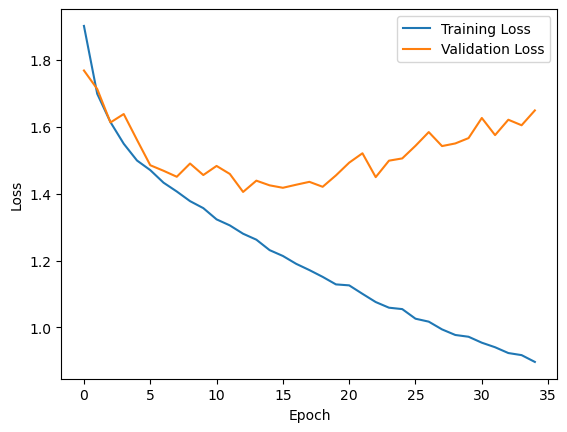

MLP Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.53      0.57      1000
           1       0.63      0.58      0.60      1000
           2       0.37      0.42      0.39      1000
           3       0.33      0.41      0.37      1000
           4       0.40      0.45      0.42      1000
           5       0.41      0.35      0.38      1000
           6       0.51      0.57      0.54      1000
           7       0.63      0.50      0.56      1000
           8       0.66      0.58      0.62      1000
           9       0.54      0.56      0.55      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.50     10000
weighted avg       0.51      0.50      0.50     10000



In [39]:
import matplotlib.pyplot as plt

# Plotting the training loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# precision, recall, and f1-score
from sklearn.metrics import classification_report

mlp_probs = mlp_model.predict(test_data_flat)
mlp_predictions = np.argmax(mlp_probs, axis=1)
mlp_report = classification_report(test_labels, mlp_predictions, target_names=[str(i) for i in range(num_classes)])
print("MLP Classification Report:\n", mlp_report)

In [40]:
acc = history.history['accuracy']
print("MLP accuracy on test set:", np.round(acc[-1]*100, 2), '%')

MLP accuracy on test set: 67.82 %


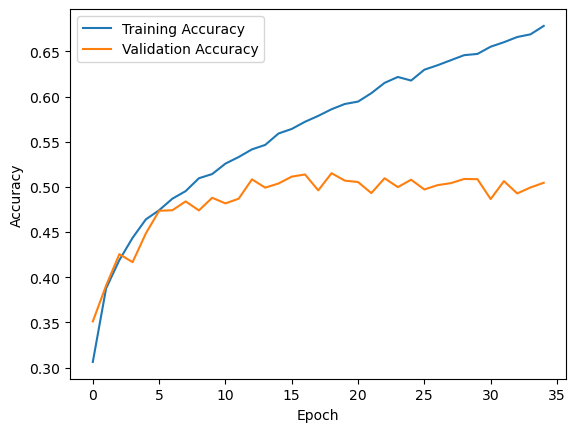

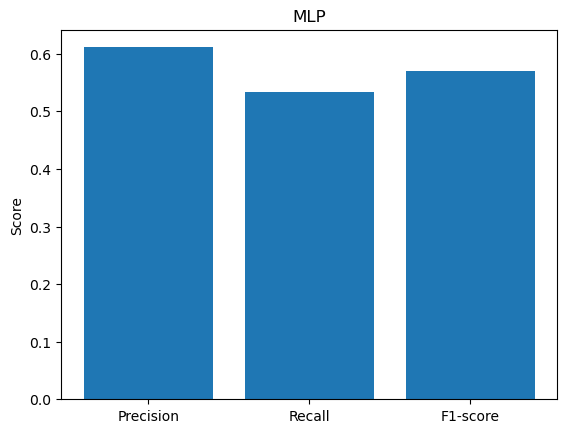

In [52]:
# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


precision = mlp_report['0']['precision']
recall = mlp_report['0']['recall']
f1_score = mlp_report['0']['f1-score']

# Plot the precision, recall, and F1-score
labels = ['Precision', 'Recall', 'F1-score']
values = [precision, recall, f1_score]

plt.bar(labels, values)
plt.ylabel('Score')
plt.title('MLP')
plt.show()

In [4]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
shuffle_files = True
as_supervised = True
with_info = True

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

# Compile the model with 'categorical_crossentropy' loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    validation_split=0.15,
    rotation_range=10,
    channel_shift_range=0.05,
)

# Train the model
batchSize = 64
numEpochs = 20

# Create a subset of the training and validation data
split_index = int(0.85 * len(X_train))
trainImages, trainLabels = X_train[:split_index], y_train[:split_index]
validationImages, validationLabels = X_train[split_index:], y_train[split_index:]

# Train the model using the generators with one-hot encoded labels
train_generator = datagen.flow(trainImages, trainLabels, batch_size=batchSize)
validation_generator = datagen.flow(validationImages, validationLabels, batch_size=batchSize)

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=numEpochs)

# Evaluate the model on the test set with one-hot encoded labels
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batchSize)

# Get the predicted probabilities for each class
y_pred_probabilities = model.predict(X_test)

# Get the predicted class for each sample
test_predictions = np.argmax(y_pred_probabilities, axis=1)

# Convert test labels to integer format (non-one-hot encoded)
y_test_int = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score values for the model
precision = precision_score(y_test_int, test_predictions, average='macro')
recall = recall_score(y_test_int, test_predictions, average='macro')
f1_score_val = f1_score(y_test_int, test_predictions, average='macro')

# Print the evaluation results
print("Test Loss: {:.4f}, Test Accuracy: {:.4f}".format(test_loss, test_accuracy))
print("Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(precision, recall, f1_score_val))


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)

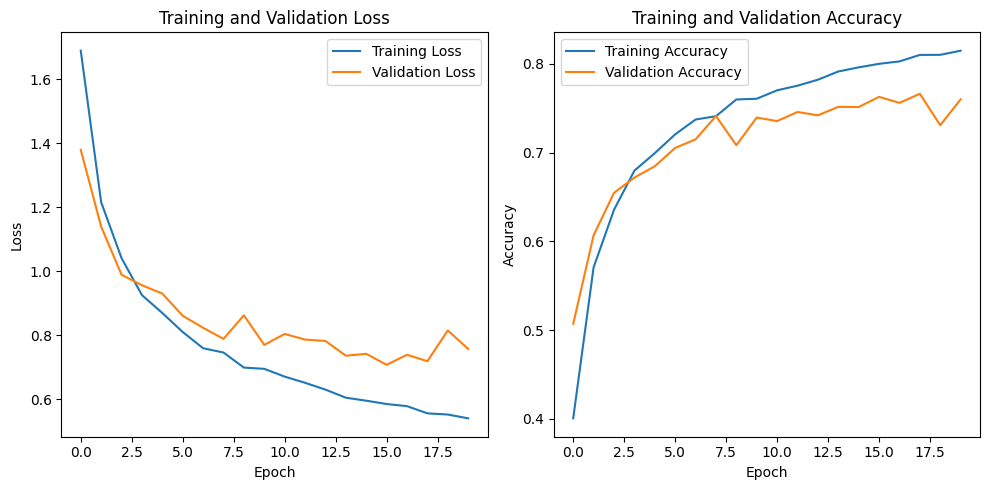

Test Loss: 0.8099, Test Accuracy: 0.7531
Precision: 0.7563, Recall: 0.7531, F1-score: 0.7527


In [5]:
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Plot the training loss and accuracy curves
def plot_training_results(history):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training loss and accuracy curves for the model
plot_training_results(history)

# Calculate precision, recall, and F1-score values for the model
precision = precision_score(y_test_int, test_predictions, average='macro')
recall = recall_score(y_test_int, test_predictions, average='macro')
f1_score_val = f1_score(y_test_int, test_predictions, average='macro')

# Print the evaluation results
print("Test Loss: {:.4f}, Test Accuracy: {:.4f}".format(test_loss, test_accuracy))
print("Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(precision, recall, f1_score_val))

In [66]:
# SVM
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.datasets import cifar10
import numpy as np

# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Randomly sampling 5,000 images
num_samples = 5000
random_indices = np.random.choice(X_train.shape[0], num_samples, replace=False)
X_train_subset = X_train[random_indices]
y_train_subset = y_train[random_indices]

# Flatten the images
train_data_flat = X_train_subset.reshape(X_train_subset.shape[0], -1)
test_data_flat = X_test.reshape(X_test.shape[0], -1)

# Flatten the labels
y_train_flat = y_train_subset.ravel()
y_test_flat = y_test.ravel()

scaler = StandardScaler()
train_data_flat = scaler.fit_transform(train_data_flat)
test_data_flat = scaler.transform(test_data_flat)

# Define the SVM model
svm_model = LinearSVC()

# Define a smaller set of hyperparameters to test using Grid Search
param_grid = {'C': [0.1, 1, 10]}

try:
    # Grid search with cross-validation
    grid_search = GridSearchCV(svm_model, param_grid, cv=2)
    grid_search.fit(train_data_flat, y_train_flat)

    # Getting the best SVM model and its hyperparameters
    best_svm_model = grid_search.best_estimator_
    best_svm_params = grid_search.best_params_

    # Evaluating the best SVM model on the test set
    svm_predictions = best_svm_model.predict(test_data_flat)
    svm_accuracy = accuracy_score(y_test_flat, svm_predictions)

    print("Best SVM model hyperparameters:", best_svm_params)
    print("SVM accuracy on test set:", svm_accuracy)

except Exception as e:
    print("Error occurred during GridSearchCV:", str(e))


/Users/manvendrasharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/manvendrasharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/manvendrasharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/manvendrasharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/manvendrasharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/manvendrasharma/opt/ana

Best SVM model hyperparameters: {'C': 0.1}
SVM accuracy on test set: 0.253


Best SVM model hyperparameters: {'C': 0.1}
SVM accuracy on test set: 25.3 %
SVM precision on test set: 26.15
SVM recall on test set: 27.9
SVM f1-score on test set: 27.0


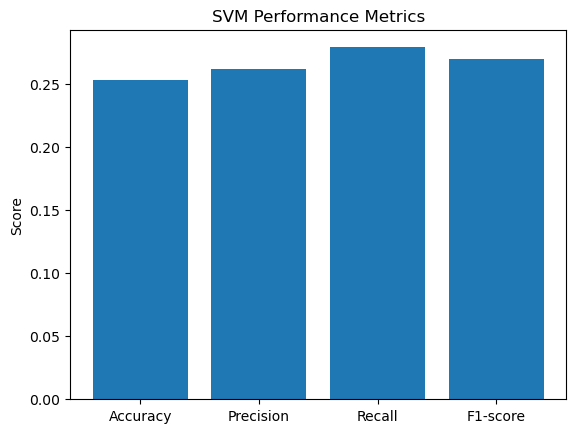

In [67]:
from sklearn.metrics import accuracy_score, classification_report 
import matplotlib.pyplot as plt
# precision, recall, and F1-score
svm_report = classification_report(y_test_flat, svm_predictions, target_names=[str(i) for i in range(10)], output_dict=True)

svm_precision = svm_report['0']['precision']
svm_recall = svm_report['0']['recall']
svm_f1_score = svm_report['0']['f1-score']


print("Best SVM model hyperparameters:", best_svm_params)
print("SVM accuracy on test set:", svm_accuracy*100,'%')
print("SVM precision on test set:", np.round(svm_precision*100,2))
print("SVM recall on test set:", np.round(svm_recall*100,3))
print("SVM f1-score on test set:", np.round(svm_f1_score*100,2))


# Plot the results
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [svm_accuracy, svm_precision, svm_recall, svm_f1_score]

plt.bar(labels, values)
plt.ylabel('Score')
plt.title('SVM Performance Metrics')
plt.show()

In [ ]:
# Plotting the results
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [svm_accuracy, svm_precision, svm_recall, svm_f1_score]

plt.bar(labels, values)
plt.ylabel('Score')
plt.title('SVM Performance Metrics')
plt.show()

/Users/manvendrasharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/manvendrasharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

---- 0.211


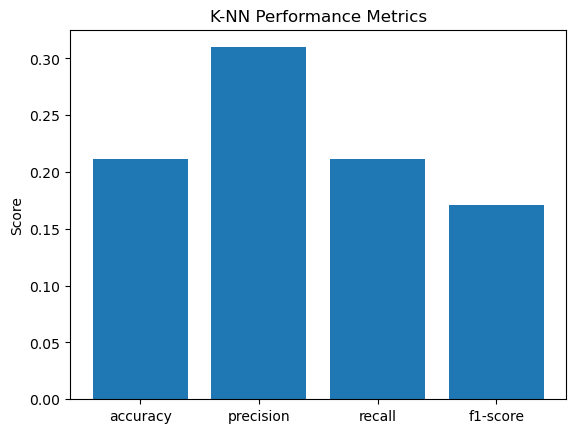

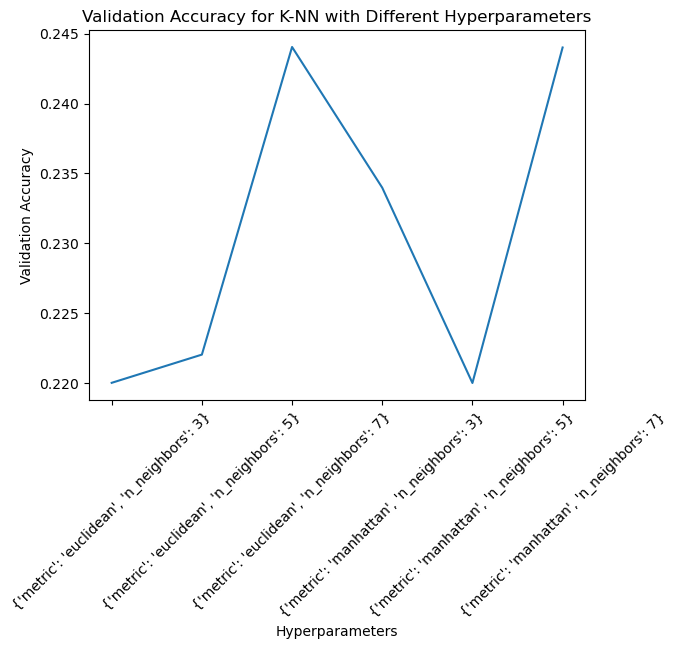

In [68]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Randomly sampling 500 images
num_samples = 500
random_indices = np.random.choice(X_train.shape[0], num_samples, replace=False)
X_train_subset = X_train[random_indices]
y_train_subset = y_train[random_indices]
 
# Flatten the images
train_data_flat = X_train_subset.reshape(X_train_subset.shape[0], -1)
test_data_flat = X_test.reshape(X_test.shape[0], -1)

# Flatten the labels
y_train_flat = y_train_subset.ravel()
y_test_flat = y_test.ravel()

# Defining the K-NN model
knn_model = KNeighborsClassifier()

# Defining the hyperparameters
param_grid = {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']}

# Performing grid search with cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=3)
grid_search.fit(train_data_flat, y_train_flat)

# Getting the best K-NN model and its hyperparameters
best_knn_model = grid_search.best_estimator_
best_knn_params = grid_search.best_params_

# Evaluating the best K-NN model on the test set
knn_predictions = best_knn_model.predict(test_data_flat)
knn_accuracy = accuracy_score(y_test_flat, knn_predictions)

# accuracy, precision, recall, and F1-score
classNames = [str(i) for i in range(10)]
classification_report_dict = classification_report(y_test_flat, knn_predictions, target_names=classNames, output_dict=True)

metrics = ['accuracy', 'precision', 'recall', 'f1-score']
values = [knn_accuracy, classification_report_dict['macro avg']['precision'], classification_report_dict['macro avg']['recall'], classification_report_dict['macro avg']['f1-score']]
print('----', knn_accuracy)
plt.bar(metrics, values)
plt.ylabel('Score')
plt.title('K-NN Performance Metrics')
plt.show()


plt.plot(grid_search.cv_results_['mean_test_score'])
plt.xticks(np.arange(len(grid_search.cv_results_['params'])), [str(param) for param in grid_search.cv_results_['params']], rotation=45)
plt.xlabel('Hyperparameters')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for K-NN with Different Hyperparameters')
plt.show()
